In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC


## SVM Classification

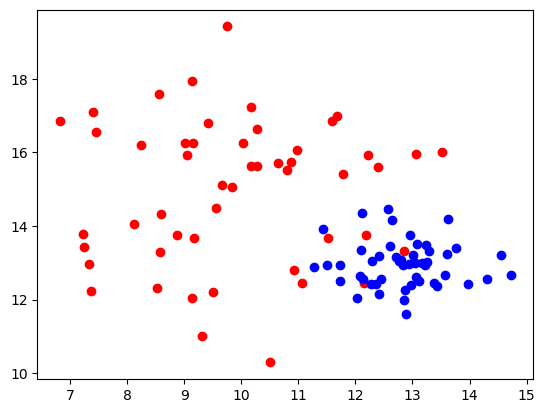

In [2]:
mu_x_1 = 13.0  # Пример координаты x
mu_y_1 = 13.0  # Пример координаты y
sigma_1 = 0.7  # Можно изменить на другое значение по вашему усмотрению
mu_x_2 = 10  # Пример координаты x
mu_y_2 = 15  # Пример координаты y
sigma_2 = 1.8  # Можно изменить на другое значение по вашему усмотрению
num_samples_1 = 50  # Количество шумовых точек
num_samples_2 = 50
x1 = np.random.normal(mu_x_1, sigma_1, num_samples_1)
y1 = np.random.normal(mu_y_1, sigma_1, num_samples_1)
x2 = np.random.normal(mu_x_2, sigma_2, num_samples_2)
y2 = np.random.normal(mu_y_2, sigma_2, num_samples_2)

X = np.array(list(zip(np.concatenate([x1,x2]) , np.concatenate([y1,y2]))))
y = np.concatenate([np.zeros(num_samples_1), np.ones(num_samples_2)] ) 

plt.scatter(x2 ,y2 , color='red')
plt.scatter(x1 ,y1 , color='blue')
plt.show()

In [3]:
# def custom_kernel(X, Y):
#     return np.dot(X, Y.T)
# gram_matrix = custom_kernel(X, X)
# print(gram_matrix)

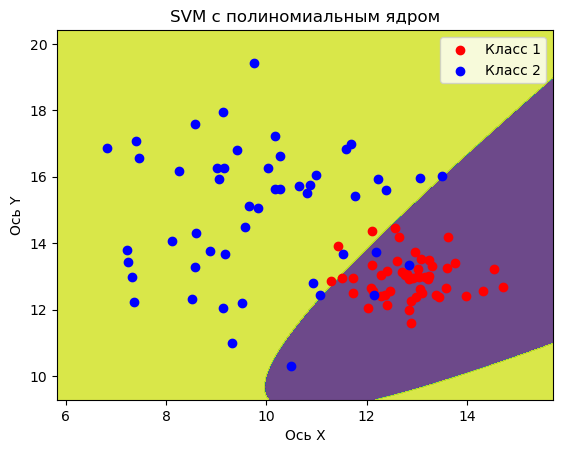

In [9]:
# Обучение SVM , ядра: 'linear', 'precomputed', 'sigmoid', 'rbf', 'poly'
svm = SVC(kernel='poly', degree=3, C=0.2)
svm.fit(X, y)

# Создание сетки для построения графика
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

# Предсказание классов для каждой точки на сетке
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построение графика с разделяющей линией и двумя областями
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x1, y1, c='red', label='Класс 1')
plt.scatter(x2, y2, c='blue', label='Класс 2')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.legend()
plt.title('SVM с полиномиальным ядром')
plt.show()

## SVM regression

In [12]:
from sklearn.svm import SVR

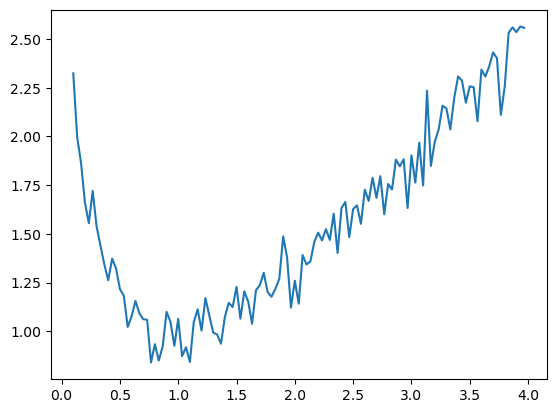

In [55]:
nums = 30
x = np.arange(0.1,4.0,1.0/nums)
y = x - np.log(x) + np.random.normal(0,0.1,len(x))
plt.plot(x,y)
plt.show()

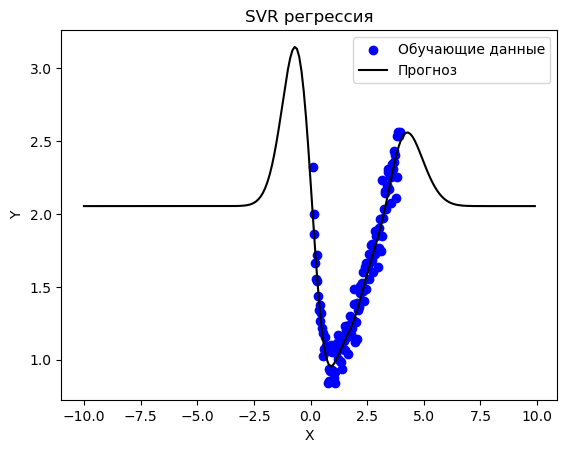

In [57]:

# Создание и обучение модели SVR : 'rbf', 'poly', 'sigmoid', 'linear', 'precomputed'
svm_regressor = SVR(kernel='rbf', C=10.0)  # Выберите ядро и параметры по вашему выбору
x = x.reshape(-1, 1)  # Изменение формы x на (n_samples, n_features)
svm_regressor.fit(x, y)

# Генерация новых данных для предсказания
x_test = np.arange(-10, 10, 0.1).reshape(-1, 1)  # Изменение формы x_test на (n_samples, n_features)

# Предсказание значений регрессии
y_pred = svm_regressor.predict(x_test)

# Визуализация результатов
plt.scatter(x, y, label='Обучающие данные', color='blue')
plt.plot(x_test, y_pred, label='Прогноз', color='black', linestyle='-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('SVR регрессия')
plt.show()